In [1]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
!pip install h2o


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697898 sha256=e5c912a3ba5302a89073f141aa5b3ab2dfdb91b3c4d38d6daea496dea2581c02
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o


In [6]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095447 sha256=8606ac5ec2e9936be31c5a6168997a71a672bfba9772c46b832310554210f832
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [109]:
from surprise import SVD, Dataset, Reader, accuracy
import h2o


In [3]:
colab_path = '/content/drive/MyDrive/ColabNotebooks/제2회 코스포 x 데이콘 도서 추천 알고리즘 AI경진대회(채용 연계형)/'

In [111]:
train = pd.read_csv(colab_path+'/train.csv')
test = h2o.import_file(colab_path+'/test.csv')

H2OConnectionError: ignored

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [ ]:
# 결측치 확인
train.isnull().sum()

ID                     0
User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [ ]:
test.isnull().sum()

ID                     0
User-ID                0
Book-ID                0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [ ]:
train['Book-Rating'].value_counts()

0     548804
8      76971
10     60024
7      55852
9      50494
5      38416
6      26670
4       6462
3       4374
2       2019
1       1307
Name: Book-Rating, dtype: int64

In [ ]:
# 각 열의 고유값의 수
train.nunique()


ID                     871393
User-ID                 83256
Book-ID                243441
Book-Rating                11
Age                       137
Location                20971
Book-Title             217829
Book-Author             92635
Year-Of-Publication       110
Publisher               15505
dtype: int64

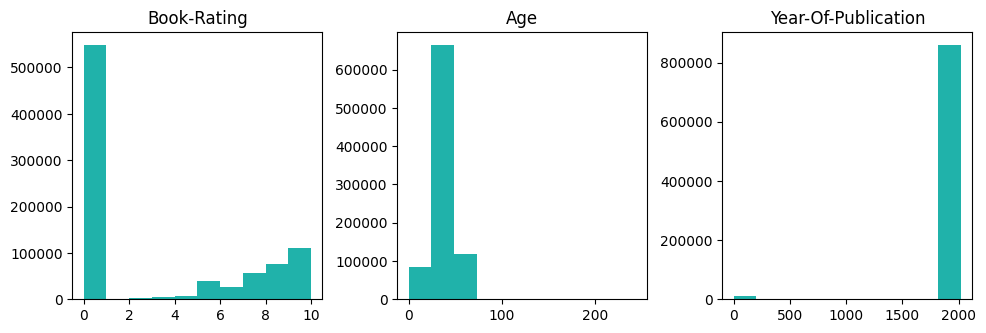

In [ ]:
train.hist(bins = 10 , layout = (4,5), figsize = (20,17)  ,column = train.columns[1:], color= "LightSeaGreen", grid = False)
plt.show()

In [ ]:
# 수치형 데이터 분포 확인
train['Year-Of-Publication'].value_counts()

2002.0    77173
2001.0    67566
1999.0    64175
2000.0    61749
2003.0    60744
          ...  
2008.0        1
1909.0        1
1904.0        1
1378.0        1
1910.0        1
Name: Year-Of-Publication, Length: 110, dtype: int64

In [52]:
train.loc[train['Year-Of-Publication'] == 2005, :]


,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
11726,TRAIN_011726,USER_01406,BOOK_242924,0,35,"bagshot, surrey, united kingdom","PS, I Love You",Cecelia Ahern,2005.0,Hyperion
20003,TRAIN_020003,USER_02076,BOOK_102434,8,63,"albuquerque, new mexico, usa",The Five Love Languages: Five Love Languages,Gary Chapman,2005.0,Moody Publishers
23375,TRAIN_023375,USER_02575,BOOK_102434,0,28,"saugus, massachusetts, usa",The Five Love Languages: Five Love Languages,Gary Chapman,2005.0,Moody Publishers
29045,TRAIN_029045,USER_03215,BOOK_102434,8,30,"farmington hills, michigan, usa",The Five Love Languages: Five Love Languages,Gary Chapman,2005.0,Moody Publishers
47056,TRAIN_047056,USER_04601,BOOK_102434,0,28,"duluth, minnesota, usa",The Five Love Languages: Five Love Languages,Gary Chapman,2005.0,Moody Publishers
...,...,...,...,...,...,...,...,...,...,...
833089,TRAIN_833089,USER_87556,BOOK_059042,0,28,"manchester, england, united kingdom","Ninth Life of Louis Drax, The -POSTPONED",Liz Jensen,2005.0,Bloomsbury USA
846802,TRAIN_846802,USER_89542,BOOK_166042,0,35,"middle park, victoria, australia",Red Dwarf,Grant Naylor,2005.0,Penguin Books Ltd
851752,TRAIN_851752,USER_90042,BOOK_231698,0,30,"fairbanks, alaska, usa",Thereby Hangs a Tale,Charles E. Funk,2005.0,HarperResource
863588,TRAIN_863588,USER_91307,BOOK_166042,8,44,"new plymouth, taranaki, new zealand",Red Dwarf,Grant Naylor,2005.0,Penguin Books Ltd


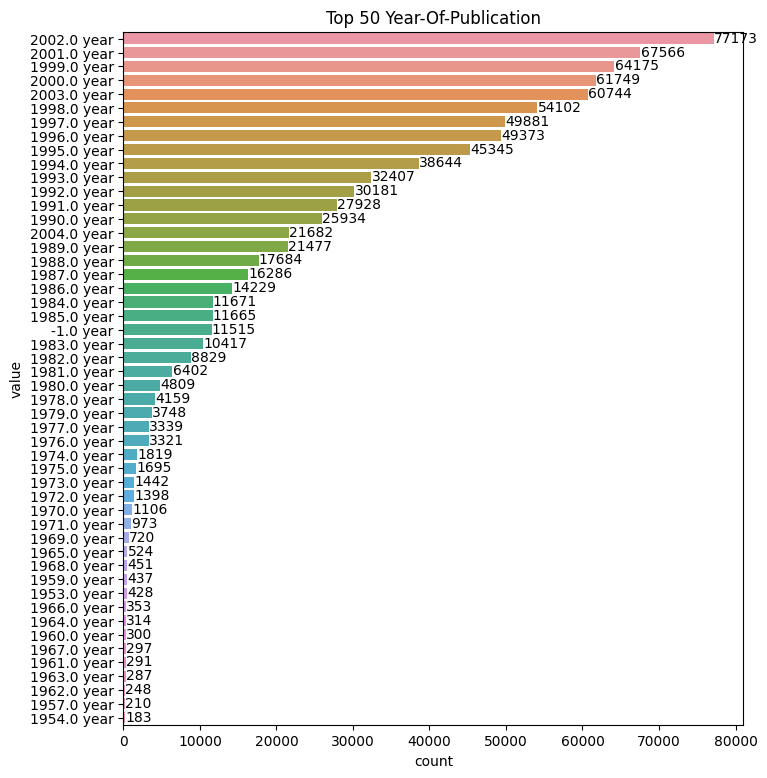

In [ ]:
ds = train['Year-Of-Publication'].value_counts().reset_index()
ds.columns = ['value', 'count']
ds['value'] = ds['value'].astype(str) + ' year'
ds = ds.sort_values('count', ascending=False).head(50)

plt.figure(figsize=(8, 9))
sns.barplot(data=ds, x='count', y='value', orient='h')
plt.title('Top 50 Year-Of-Publication')

# 데이터 레이블 추가
for i, v in enumerate(ds['count']):
    plt.text(v + 20, i + .25, str(v), color='black', fontsize=10)

plt.show()


In [ ]:
train['Year-Of-Publication'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 871393 entries, 0 to 871392
Series name: Year-Of-Publication
Non-Null Count   Dtype  
--------------   -----  
871393 non-null  float64
dtypes: float64(1)
memory usage: 6.6 MB


In [ ]:
#train = train[train['Year-Of-Publication'] != -1]
#train

In [112]:
print(sorted(train.Age.unique()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 89.0, 90.0, 92.0, 93.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 103.0, 104.0, 105.0, 107.0, 108.0, 109.0, 114.0, 116.0, 118.0, 123.0, 124.0, 127.0, 128.0, 132.0, 136.0, 138.0, 140.0, 141.0, 146.0, 147.0, 148.0, 151.0, 152.0, 157.0, 168.0, 199.0, 200.0, 201.0, 204.0, 209.0, 212.0, 219.0, 220.0, 223.0, 226.0, 228.0, 229.0, 237.0, 239.0, 244.0]


In [113]:
train.loc[(train.Age > 80) | (train.Age < 7), 'Age'] = np.nan

In [114]:
train['Age'].fillna(train['Age'].mode()[0], inplace=True)

In [115]:
train['Age'].isnull().sum()

0

In [116]:
train['Age'] = train['Age'].astype(int)

In [117]:
print(sorted(train.Age.unique()))
print(train.Age.value_counts())

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
35    256459
33     27349
29     25456
30     23085
31     22515
       ...  
80       135
77       133
7        108
78       104
79        95
Name: Age, Length: 74, dtype: int64


In [118]:
train = train[train['Year-Of-Publication'] >= 1980]
train = train[train['Year-Of-Publication'] < 2005]


In [119]:
print(train['Book-Rating'].shape)

(830353,)


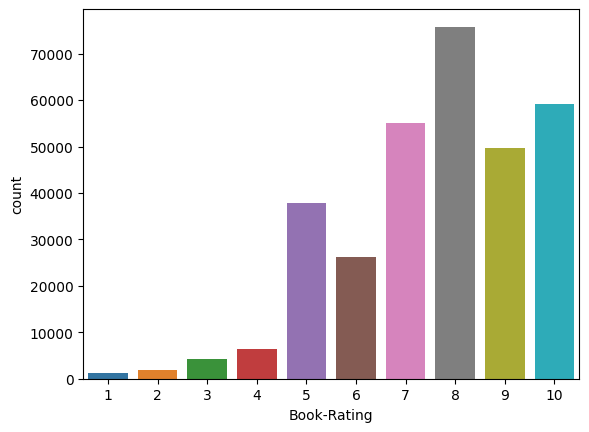

In [ ]:
#plotting count of bookRating
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=ratings_explicit , x='Book-Rating')
plt.show()

In [ ]:
# Collaborative Filtering Based Recommendation Systems
# For more accurate results only consider users who have rated atleast 520 books

In [64]:
counts1 = pd.value_counts(train['User-ID'])
counts1

USER_56601    10534
USER_54845     5939
USER_52453     5687
USER_73501     4130
USER_03411     3453
              ...  
USER_39440        1
USER_39443        1
USER_39445        1
USER_39446        1
USER_92100        1
Name: User-ID, Length: 80698, dtype: int64

In [67]:
counts1[counts1 >= 100]

USER_56601    10534
USER_54845     5939
USER_52453     5687
USER_73501     4130
USER_03411     3453
              ...  
USER_91125      100
USER_90379      100
USER_50760      100
USER_06024      100
USER_84475      100
Name: User-ID, Length: 1328, dtype: int64

In [68]:
train_new = train[train['User-ID'].isin(counts1[counts1 >= 100].index)]

In [48]:
train_new.shape

(687812, 10)

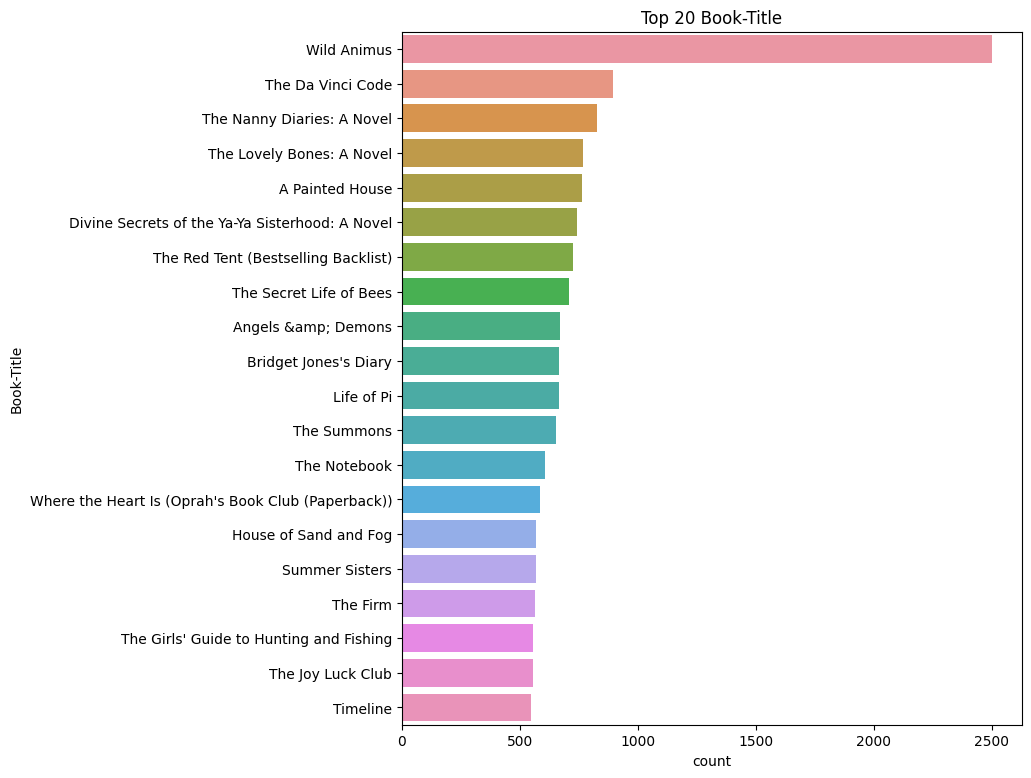

In [ ]:
ds = train['Book-Title'].value_counts().reset_index()
ds.columns = ['Book-Title', 'count']
ds = ds.sort_values('count', ascending=False).head(20)

plt.figure(figsize=(8, 9))
sns.barplot(data=ds, x='count', y='Book-Title')
plt.title('Top 20 Book-Title')
plt.xlabel('count')
plt.ylabel('Book-Title')
plt.show()

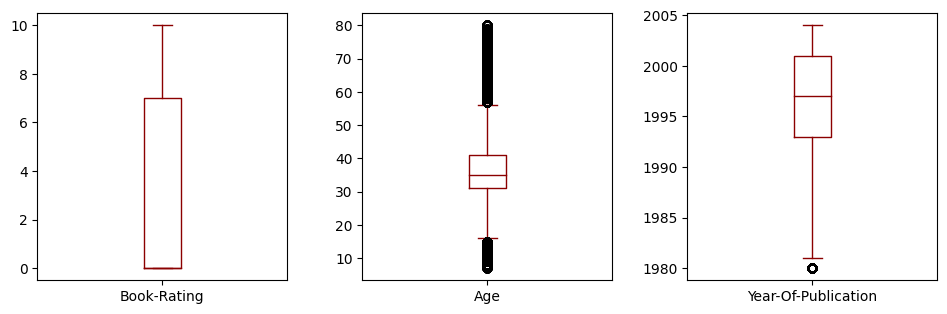

In [107]:
train.plot(subplots =True, kind = 'box', layout = (4,5), figsize = (20,17), color = 'DarkRed')
plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

In [120]:
# Surprise 라이브러리용 Reader 및 Dataset 객체 생성
reader = Reader(rating_scale=(0, 10))
train = Dataset.load_from_df(train[['User-ID', 'Book-ID', 'Book-Rating']], reader)
train = train.build_full_trainset()

In [121]:
# SVD 모델 훈련
model = SVD()
model.fit(train)

In [122]:
submit  = pd.read_csv(colab_path + '/sample_submission.csv')

In [123]:
submit['Book-Rating'] = test.apply(lambda row: model.predict(row['User-ID'], row['Book-ID']).est, axis=1)


In [124]:
submit['Book-Rating']

0         5.723534
1         5.182519
2         5.067084
3         5.555839
4         5.518182
            ...   
159616    3.691597
159617    2.370575
159618    2.866031
159619    2.870138
159620    2.596684
Name: Book-Rating, Length: 159621, dtype: float64

In [125]:
submit.to_csv('./svd25.csv', index=False)